# STAT3612 Lecture 9 - 	Support Vector Machines 

[Dr. Aijun Zhang](http://www.statsoft.org) & [Mr. Hengtao Zhang](zhanght@connetc.hku.hk) - [STAT3612 Statistical Machine Learning](http://www.statsoft.org/teaching/stat3612/)

8 November 2019

# SVM for Mixture Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.colors as col
def plot_decision_boundary(x, y, model, title):
    h = 0.02
    x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max() +0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max() +0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    cmap_light = col.ListedColormap(['#AAFFAA','#AAAAFF','#FFAAAA'])
    cmap_bold = col.ListedColormap(['#00FF00','#0000FF','#FF0000'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.clf()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, 
                    edgecolor='k',cmap=cmap_bold)
    
    plt.title(title, fontsize = 20)

In [3]:
mixture_data = pd.read_table('./mixture.txt',sep=',',index_col=0)
x_mix,y_mix=mixture_data.iloc[:,:2].values,mixture_data['y'].values

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Accuracy: 0.73


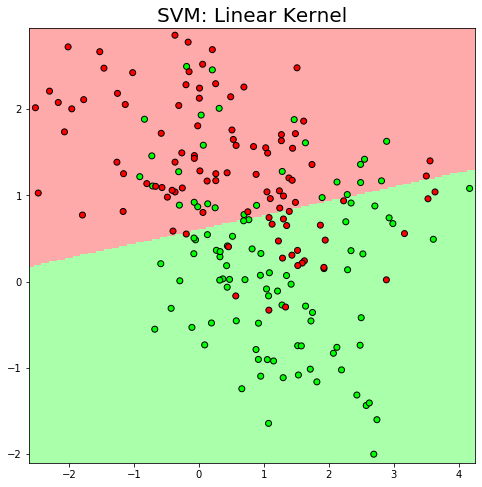

In [5]:
clf = SVC(kernel='linear')
clf.fit(x_mix,y_mix)
# decision boundary
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,clf,"SVM: Linear Kernel")
plt.show()

Accuracy: 0.66


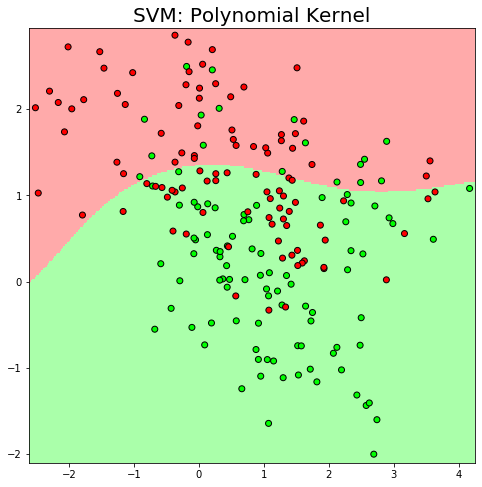

In [6]:
clf = SVC(kernel = 'poly', gamma='scale')
clf.fit(x_mix, y_mix)
# decision boundary
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,clf,"SVM: Polynomial Kernel")
plt.show()

Accuracy: 0.79


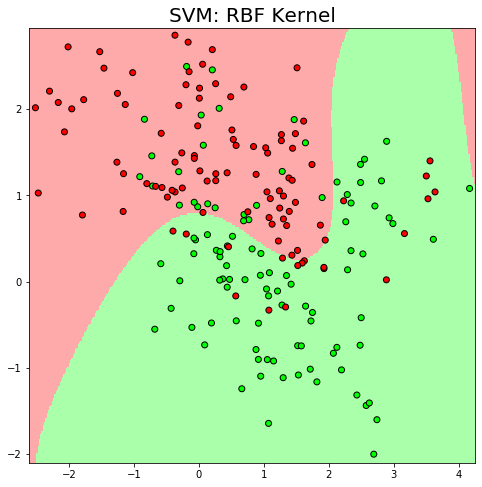

In [7]:
clf = SVC(kernel = 'rbf', gamma='scale')
clf.fit(x_mix, y_mix)
# decision boundary
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))
plt.figure(figsize=(8, 8))
plot_decision_boundary(x_mix,y_mix,clf,"SVM: RBF Kernel")
plt.show()

# Hyperparameter Optimization

In [8]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

**Consider SVM with RBF Kernel**

In [9]:
# no tuning
svc = SVC(gamma="scale",kernel='rbf')
svc.fit(x_mix,y_mix)
print('Accuracy:',accuracy_score(y_mix,svc.predict(x_mix)))

Accuracy: 0.79


## Grid Search

In [10]:
param_grid = [
  {'C': np.logspace(0.1,1,10), 'gamma': np.logspace(-3,3,10)},
 ]
svc = SVC(gamma="scale",kernel='rbf')
clf = GridSearchCV(svc, param_grid, cv=5, verbose=1)
clf.fit(x_mix,y_mix)
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.865


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished


## Random Search

In [11]:
# in randomized search, we can specify the parameter distribution
import scipy.stats as sps
param_grid = {'C': sps.uniform(loc=1,scale=2), 'gamma': sps.uniform(loc=0.01,scale=20)}
np.random.seed(2019)
svc = SVC(gamma="scale")
clf = RandomizedSearchCV(svc, param_grid, cv=5,n_iter=100,verbose=1)
clf.fit(x_mix,y_mix)
print('Accuracy:',accuracy_score(y_mix,clf.predict(x_mix)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.88


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished


## SeqMML Package
- Github [https://github.com/zebinyang/seqmml](https://github.com/zebinyang/seqmml)

- Installation:
    - MacOS/Windows:
    ```
    !pip install git+https://github.com/ZebinYang/seqmml.git
    ```
    - Google Colab:
    ```
    !apt-get install swig3.0
    !ln -s /usr/bin/swig3.0 /usr/bin/swig
    !pip install git+https://github.com/ZebinYang/seqmml.git
    ```

In [12]:
from sklearn.model_selection import KFold 
from seqmml import SeqUD

/Users/zhanght/opt/anaconda3/lib/python3.7/site-packages/pyparsing.py:3168: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [13]:
param_grid = {'C':     {'Type': 'continuous', 'Range': [0.2, 0.5], 'Wrapper': lambda x:10**x}, 
             'gamma':  {'Type': 'continuous', 'Range': [-3, 1.5], 'Wrapper': lambda x:10**x}}

In [14]:
cv = KFold(n_splits=5, random_state=0, shuffle=True)
clf = SVC(gamma='scale',kernel='rbf')
sequd_clf = SeqUD(param_grid, level_number=20, scoring='accuracy', 
                  estimator=clf, cv=cv, refit=True, rand_seed=0, verbose=True)
sequd_clf.fit(x_mix, y_mix)

Stage 1 completed (20/100) with best score: 0.83000.
Stage 2 completed (33/100) with best score: 0.84000.
Stage 3 completed (48/100) with best score: 0.84000.
Stage 4 completed (63/100) with best score: 0.84000.
Stage 5 completed (77/100) with best score: 0.84000.
Stage 6 completed (90/100) with best score: 0.84000.
Maximum number of runs reached, stop!
SeqUD completed in 1.98 seconds.
The best score is: 0.84000.
The best configurations are:
C                   : 1.75792
gamma               : 2.37137


In [15]:
print('Accuracy:',accuracy_score(y_mix,sequd_clf.best_estimator_.predict(x_mix)))

Accuracy: 0.875


# Taiwan Credit Case Study

- We analyze the preprocessed credit data.
- Variable information:
    - **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    - **PAY_0**,**PAY_2**-**PAY_6**: Repayment status in September, August, July, June, May, April. (0=pay duly and other unknown cases, 1=payment delay for one month, 2=payment delay for two months, ..., 8=payment delay for eight months, 9=payment delay for nine months and above)
    - **BILL_AMT1**-**BILL_AMT6**: Amount of bill statement in September, August, July, June, May, April. (NT_dollar and all negative values are set to be zeros)
    - **PAY_AMT1**-**PAY_AMT3**: Amount of previous payment in September, August, July. (NT_dollar)
    - **PAY_AMT456**: The summation of the payment in June, May and April.
    - **UTIL_RAT**s: Utilization ratio calculated by BILL_AMT/LIMIT_BAL for each month denoted by UTIL_RAT1-6 and truncated to \[0,1\]. UTIL_RAT_AVG, UTIL_RAT_RANGE and UTIL_RAT_MAX correspond to the average, range and maximum value of UTIL_RATs. FLAG_UTIL_RAT1 indicates whether the value UTIL_RAT1 is truncated.
    - **PAY_RAT**s: Payment ratio calculated by PAY_AMTX/BILL_AMTX where X takes value from 1 to 6. The extended statistics follow similar definitions with UTIL_RAT.
    - **default.payment.next.month**: Default payment (1=yes, 0=no)

In [16]:
import warnings
warnings.simplefilter("ignore")

In [17]:
df = pd.read_csv('./credit_data_processed.csv').iloc[:,1:]

In [18]:
df.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,UTIL_RAT1,UTIL_RAT_AVG,UTIL_RAT_RANGE,UTIL_RAT_MAX,PAY_AMT456,FLAG_PAY_RAT1,PAY_RAT1,PAY_RAT_AVG,PAY_RAT_RANGE,PAY_RAT_MAX
0,20000.0,2,2,0,0,0,0,3913.0,3102.0,689.0,...,0.195650,0.064200,0.195650,0.195650,0.0,0,0.000000,0.037007,0.222043,0.222043
1,120000.0,0,2,0,0,0,2,2682.0,1725.0,2682.0,...,0.022350,0.023718,0.014417,0.028792,3000.0,0,0.000000,0.311790,0.613121,0.613121
2,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,...,0.324878,0.188246,0.174222,0.324878,7000.0,0,0.051915,0.115134,0.269628,0.321543
3,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,...,0.939800,0.771113,0.419540,0.985820,3169.0,0,0.042561,0.036395,0.018217,0.042561
4,50000.0,0,0,0,0,0,0,8617.0,5670.0,35835.0,...,0.172340,0.364463,0.603300,0.716700,10368.0,0,0.232072,0.335396,0.964510,1.000000


In [19]:
# remove the response's name
feature_names = np.delete(df.columns.values,16)
# feature_names
feature_names

array(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'FLAG_UTIL_RAT1',
       'UTIL_RAT1', 'UTIL_RAT_AVG', 'UTIL_RAT_RANGE', 'UTIL_RAT_MAX',
       'PAY_AMT456', 'FLAG_PAY_RAT1', 'PAY_RAT1', 'PAY_RAT_AVG',
       'PAY_RAT_RANGE', 'PAY_RAT_MAX'], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# split the data
df_train,df_test = train_test_split(df,test_size=0.2,random_state=0)

# scale the data
scaling_names = [name for name in feature_names if name not in ['FLAG_UTIL_RAT1','FLAG_PAY_RAT1']]
scaler = MinMaxScaler()
df_train_sc = df_train.copy()
df_train_sc[scaling_names] = scaler.fit_transform(df_train[scaling_names])
df_test_sc = df_test.copy()
df_test_sc[scaling_names] = scaler.transform(df_test[scaling_names])

# splitting
X_train,X_test = df_train_sc[feature_names].values,df_test_sc[feature_names].values
y_train,y_test = df_train['default.payment.next.month'].values,df_test['default.payment.next.month'].values

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score

In [22]:
# SVC is extremely slow for large data
# use SGDClassifier (SGD based SVC)

# SGDClassifier does not have .predict_proba
# use CalibratedClassifierCV to compute the prediction probability
np.random.seed(2019)
clf = CalibratedClassifierCV(SGDClassifier(),cv=5) 
clf.fit(X_train,y_train)

print('Train AUC:',roc_auc_score(y_train,clf.predict_proba(X_train)[:,1]))
print('Test AUC:',roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]))

Train AUC: 0.7432926627242489
Test AUC: 0.7397637886281677


In [23]:
# parameter tuning can take a long time
param_grid = {'base_estimator__alpha':  {'Type': 'continuous', 'Range': [-5, 1], 'Wrapper': lambda x: 10**x},
              'base_estimator__penalty': {'Type':'categorical','Mapping':['l1','l2']}}
clf = CalibratedClassifierCV(SGDClassifier(),cv=5) 
cv = KFold(n_splits=5, random_state=0, shuffle=True)
sequd_clf = SeqUD(param_grid, level_number=20, max_runs = 50,scoring='roc_auc', 
                  estimator=clf, cv=cv, refit=True, rand_seed=0, verbose=True)
sequd_clf.fit(X_train, y_train)

Stage 1 completed (20/50) with best score: 0.74170.
Stage 2 completed (37/50) with best score: 0.74697.
Maximum number of runs reached, stop!
SeqUD completed in 45.88 seconds.
The best score is: 0.74697.
The best configurations are:
base_estimator__alpha: 2e-05
base_estimator__penalty: l1


In [24]:
opt_clf = sequd_clf.best_estimator_
print('Train AUC:',roc_auc_score(y_train,opt_clf.predict_proba(X_train)[:,1]))
print('Test AUC:',roc_auc_score(y_test,opt_clf.predict_proba(X_test)[:,1]))

Train AUC: 0.7451552592339183
Test AUC: 0.7450301985756562


## SHAP

In [25]:
import shap
shap.initjs()
# define the explainer
explainer = shap.KernelExplainer(opt_clf.predict_proba,shap.kmeans(X_train,10))
# calculate the shape value on first 1000 samples
n_shap = 1000
shap_values = explainer.shap_values(X_train[:n_shap])[1]

**Force Plot**

In [26]:
# sample index
i = 1
# force plot
shap.force_plot(explainer.expected_value[1], shap_values[i,:], X_train[i],feature_names=feature_names)

In [27]:
shap.force_plot(explainer.expected_value[1], shap_values,
                X_train[:n_shap], feature_names=feature_names)

**Summary Plot**

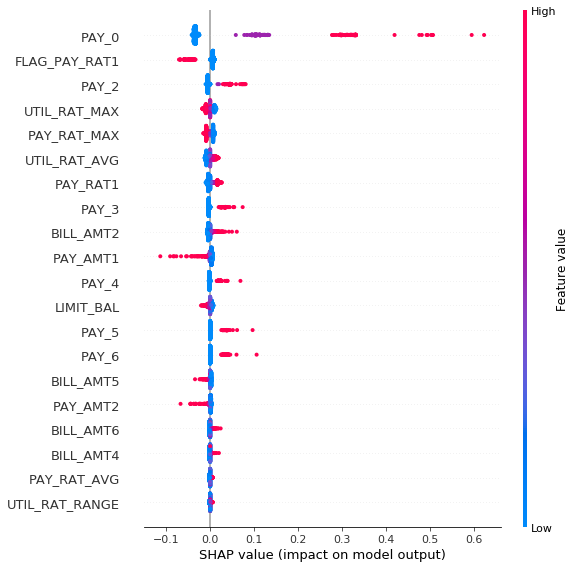

In [28]:
shap.summary_plot(shap_values, X_train[:n_shap],feature_names)

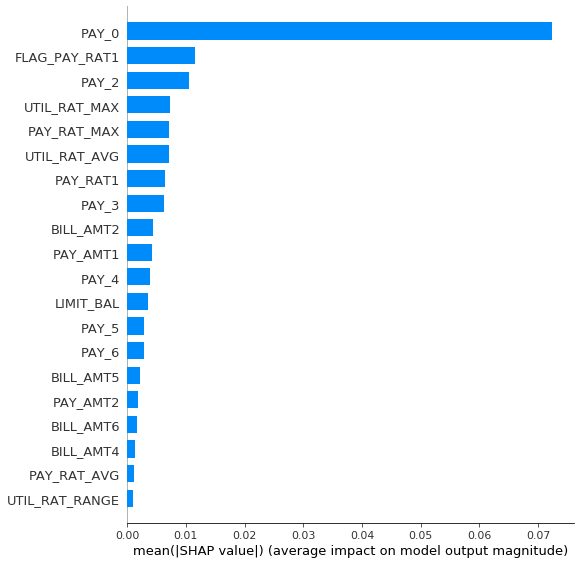

In [29]:
shap.summary_plot(shap_values, X_train[:n_shap], plot_type="bar",feature_names=feature_names)